In [8]:
# import astro_coord as ac
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.time import Time 
from astropy import coordinates
from astropy import units as u
import re #regex, if needed
import time
from threading import Timer
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd
# %matplotlib inline
import timing

In [3]:
def PST_to_uni(yr, mon, day, hr = 0, minute = 0,sec = 0):
    return int(time.mktime(time.strptime(
        str(yr) +'-'+str(mon)+'-'+str(day)+' '+str(hr)+':'+str(minute)+':'+str(sec), 
        '%Y-%m-%d %H:%M:%S')))

In [4]:
uni_to_jul = lambda unix_t: Time(unix_t, format='unix').jd

In [5]:
def get_altaz(ra,dec,jd=None,lat = 37.9183, lon = -122.1067, alt = 304, equinox='J2000'):
    """
    Return the altitude and azimuth of an object whose right ascension 
    and declination are known.
    Parameters
    ----------
    ra : float, right ascension in degrees
    dec: float, declination in degrees
    jd : float, Julian Date, default=now
    lat: float, latitude in degrees
    lon: float, longitude in degrees
    alt: float, altitude in m, 
    equinox : string, equinox of ra/dec coordinates.  default='J2000'
    Returns
    -------
    alt : float, altitude in degrees
    az : float, azimuth in degrees

    """
    if jd: t = ap.time.Time(jd,format='jd')
    else: t = ap.time.Time(time.time(),format='unix')
    l = ap.coordinates.EarthLocation(lat=lat*u.deg,
                        lon=lon*u.deg,height=alt*u.m)
    f = ap.coordinates.AltAz(obstime=t,location=l)
    c = ap.coordinates.SkyCoord(ra, dec, frame='fk5',unit='deg',equinox=equinox)
    altaz = c.transform_to(f)
    return altaz.alt.deg, altaz.az.deg

In [7]:
def convert_galactic2000_to_ra_dec(l,b):
    x0 = np.cos(np.radians(b))*np.cos(np.radians(l))
    x1 = np.cos(np.radians(b))*np.sin(np.radians(l))
    x2 = np.sin(np.radians(b))

    R = np.matrix([[-0.054876,-0.873437,-0.483835],[0.494109,-0.444830,0.746982],[-0.867666,-0.198076,0.455984]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(np.transpose(R),x)

    ra =  float(np.degrees(np.arctan2(xp[1],xp[0])))
    dec = float(np.degrees(np.arcsin(xp[2])))

    return ra, dec

In [16]:
start = PST_to_uni(2018,4,10,hr=1,minute = 0, sec=0)
end = PST_to_uni(2018,4,10,hr=18, minute= 0, sec = 0)
UNIX = np.linspace(start,end,int((((end+1)-start))/60.))
Julian = Time(UNIX, format='unix').jd

In [11]:
ll = 120
b = 0

In [12]:
ra_120, dec_120 = convert_galactic2000_to_ra_dec(120,0)

In [17]:
ALT = []
AZ = []
for jj in Julian:
    al, az = get_altaz(ra_120, dec_120, jd=jj)
    ALT.append(al)
    AZ.append(az)

(15, 85)

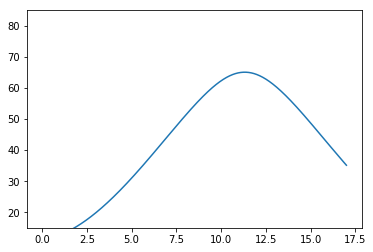

In [22]:
hrs = (Julian - Julian[0])*24
plt.plot(hrs, ALT)
plt.ylim(15,85)

(5, 355)

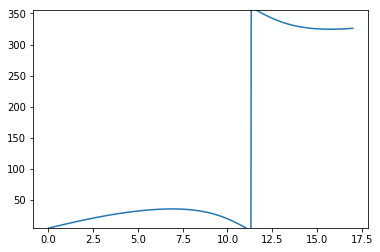

In [21]:
plt.plot(hrs, AZ)
plt.ylim(5,355)

In [29]:
gal_long = np.linspace(210,380,int((381-210)/10))
gal_lat = np.linspace(0,90,91/10)

In [55]:
LONG = []
LAT = []
for i in range(int(len(gal_long))):
    for m in range(int(len(gal_lat))):
        LONG.append(gal_long[i])
    for k in range(int(len(gal_lat))):
        LAT.append(gal_lat[k])
LONG = np.asarray(LONG)
LAT = np.asarray(LAT)

In [58]:
LONG
LAT

array([  0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,  78.75,
        90.  ,   0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,
        78.75,  90.  ,   0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,
        67.5 ,  78.75,  90.  ,   0.  ,  11.25,  22.5 ,  33.75,  45.  ,
        56.25,  67.5 ,  78.75,  90.  ,   0.  ,  11.25,  22.5 ,  33.75,
        45.  ,  56.25,  67.5 ,  78.75,  90.  ,   0.  ,  11.25,  22.5 ,
        33.75,  45.  ,  56.25,  67.5 ,  78.75,  90.  ,   0.  ,  11.25,
        22.5 ,  33.75,  45.  ,  56.25,  67.5 ,  78.75,  90.  ,   0.  ,
        11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,  78.75,  90.  ,
         0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,  78.75,
        90.  ,   0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,  67.5 ,
        78.75,  90.  ,   0.  ,  11.25,  22.5 ,  33.75,  45.  ,  56.25,
        67.5 ,  78.75,  90.  ,   0.  ,  11.25,  22.5 ,  33.75,  45.  ,
        56.25,  67.5 ,  78.75,  90.  ,   0.  ,  11.25,  22.5 ,  33.75,
      

In [30]:
RA = []
DEC = []
for i in range(int(len(gal_long))):
    for k in range(int(len(gal_lat))):
        ra, dec = ac.convert_galactic2000_to_ra_dec(gal_long[i],gal_lat[k])
        RA.append(ra)
        DEC.append(dec)
RA = np.asarray(RA)
DEC = np.asarray(DEC)

In [31]:
Alt = []
Az = []
for i,j,l in zip(RA,DEC,range(int(len(RA)))):
    if l%10 == 0:
        print(l)
    for k in range(int(len(Julian))):
        alt, az = get_altaz(i,j,jd=Julian[k])
        Alt.append(alt)
        Az.append(az)
        


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


In [33]:
Alt = np.asarray(Alt)
Az = np.asarray(Az)

In [126]:
np.save('Spur_sky_patch',Alt,Az)

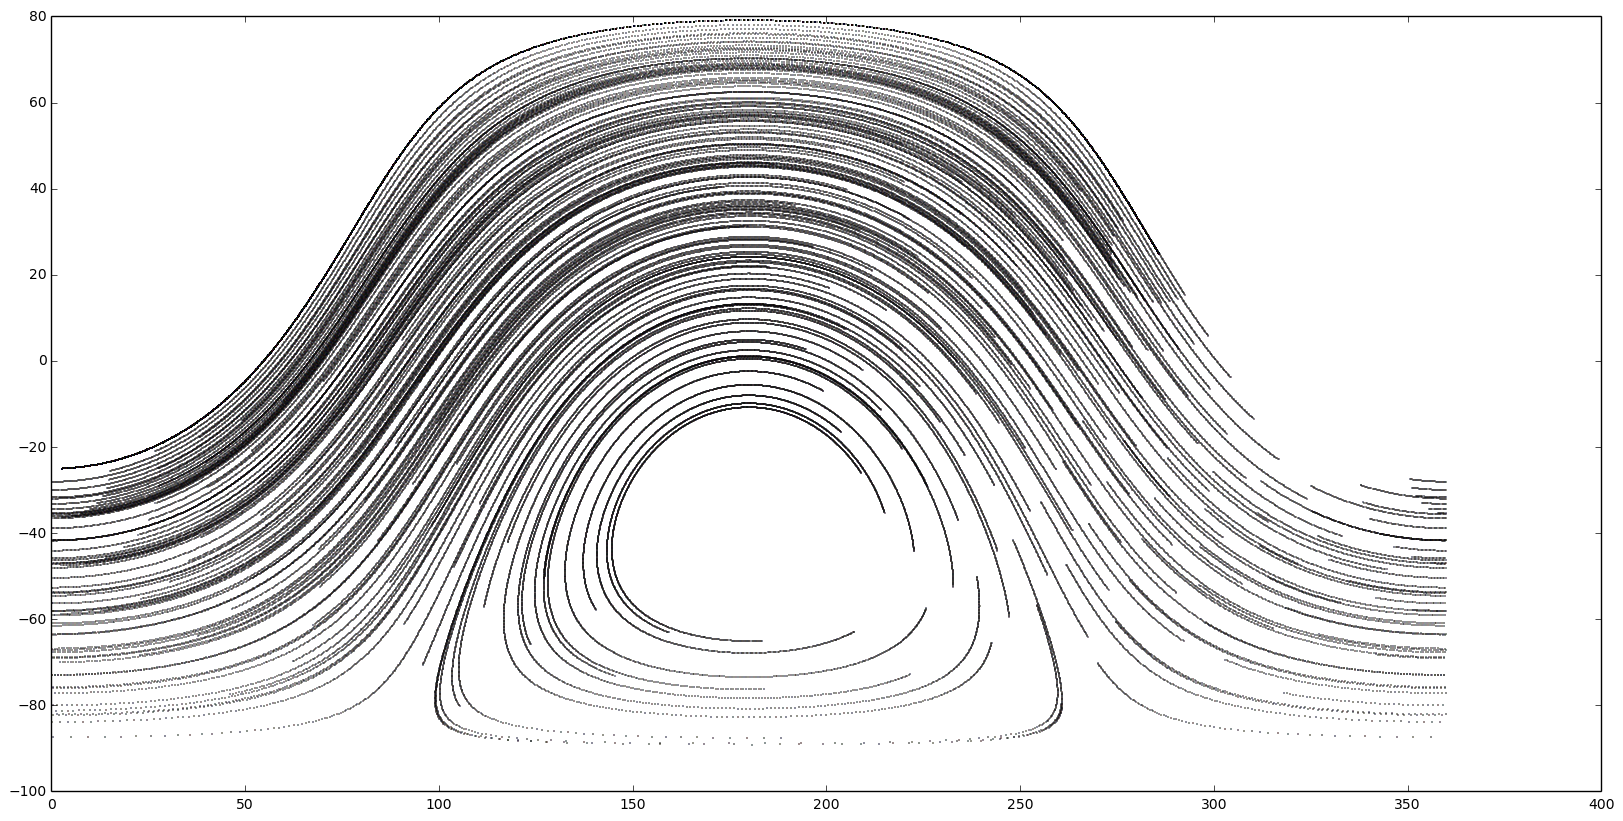

In [93]:
Alt = Alt.reshape(len(RA),len(Julian))
Az = Az.reshape(len(DEC),len(Julian))
plt.figure(figsize=(20,10))
plt.plot(Az,Alt,'o', markersize =0.5)
# plt.xlim(5,355)
# plt.ylim(15,85)
plt.show()

In [124]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)


xx = sin(np.radians(Alt))*cos(np.radians(Az))
yy = sin(np.radians(Alt))*sin(np.radians(Az))
zz = cos(np.radians(Alt))

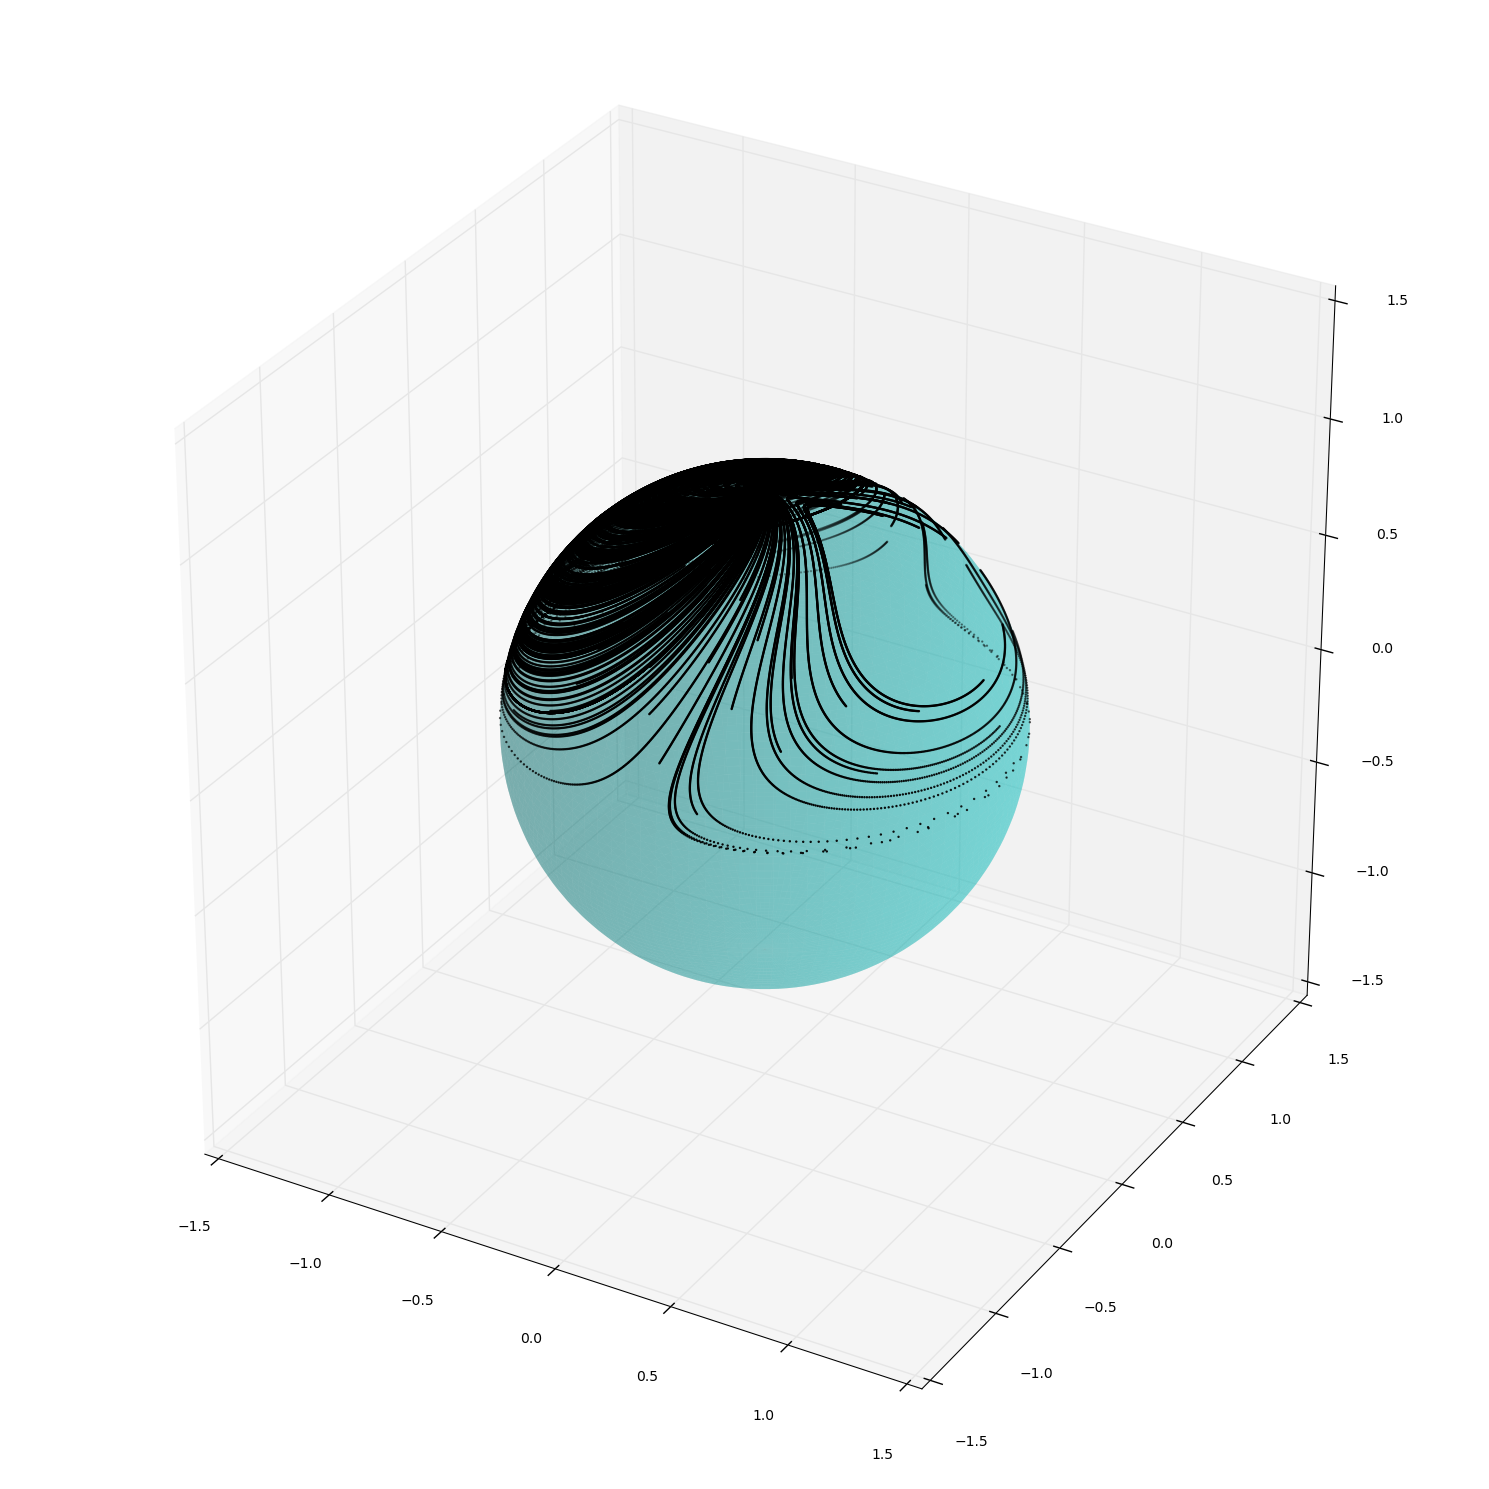

In [125]:
#Set colours and render
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

ax.scatter(xx,yy,zz,color="k",s=0.5)

# ax.set_xlim([-1,1])
# ax.set_ylim([-1,1])
# ax.set_zlim([-1,1])
ax.set_aspect("equal")
plt.tight_layout()
plt.grid(True)
plt.show()


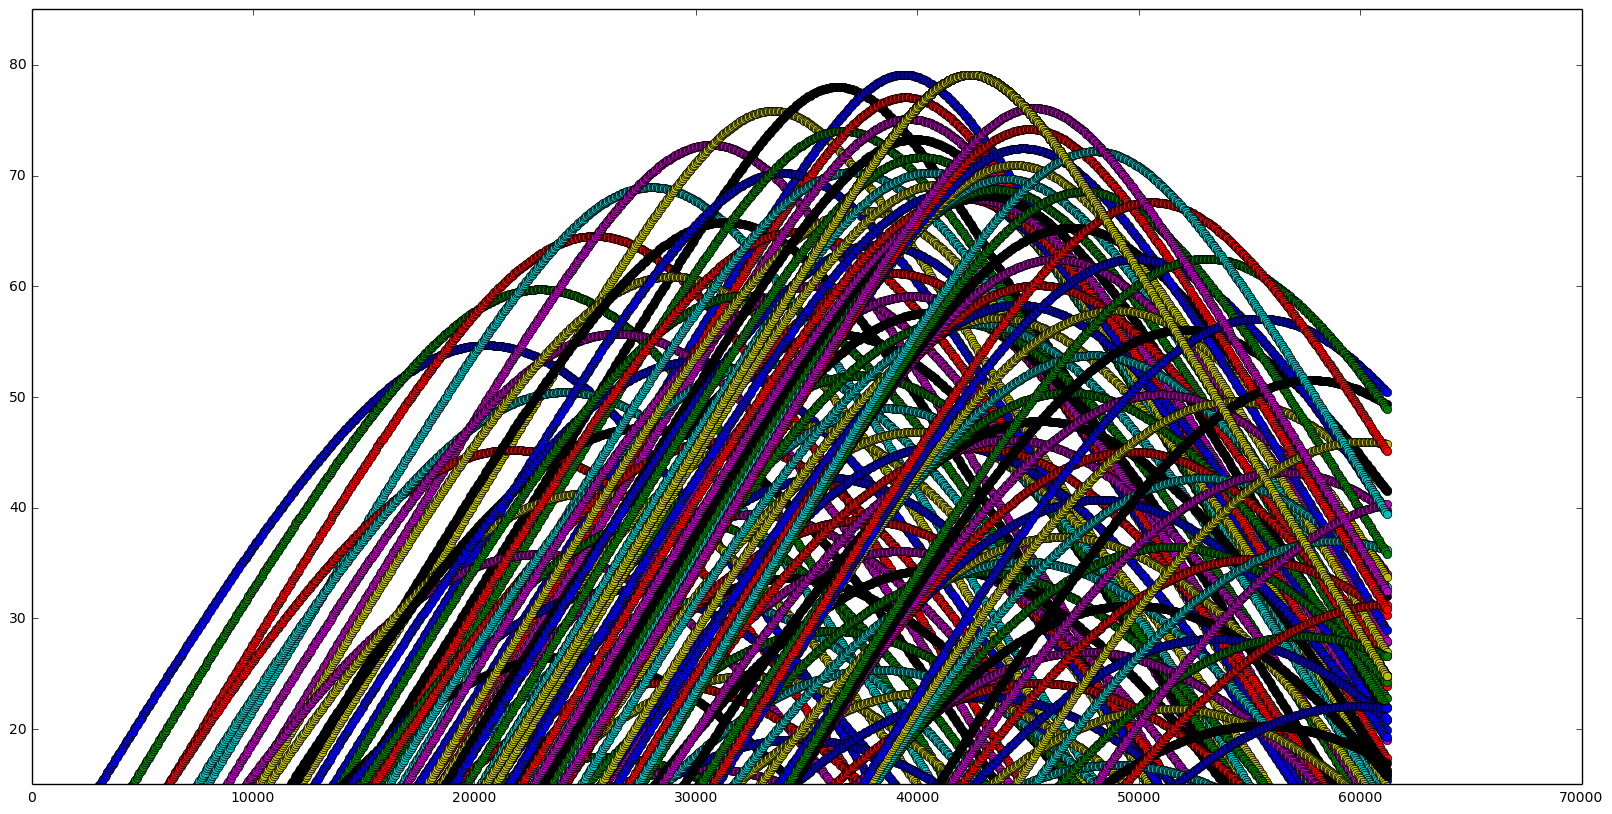

In [75]:
plt.figure(figsize=(20,10))
for i in range(int(len(Alt))):
    plt.plot(UNIX-UNIX[0],Alt[i],'o')
plt.ylim(15,85)
plt.show()

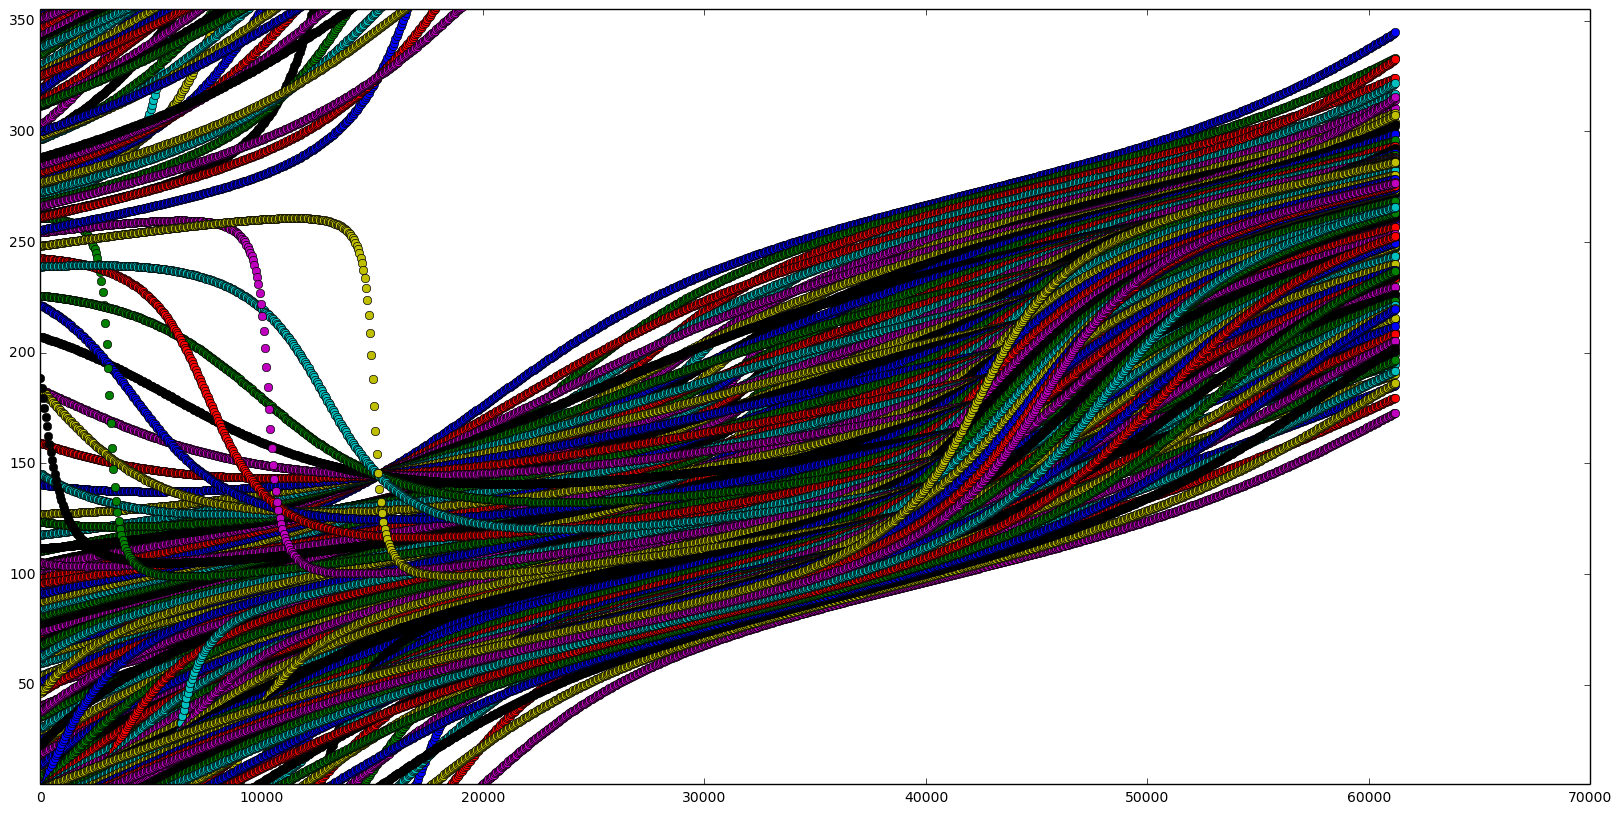

In [76]:
plt.figure(figsize=(20,10))
for i in range(int(len(Az))):
    plt.plot(UNIX-UNIX[0],Az[i],'o')
plt.ylim(5,355)
plt.show()

In [77]:
import astropy.coordinates as coord
from mpl_toolkits.mplot3d import Axes3D

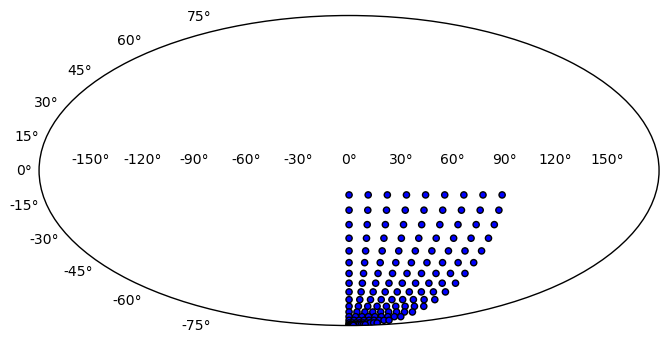

In [61]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(np.radians(LAT), np.radians(LONG))
plt.show()


In [96]:
plt.scatter?

In [113]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection='3d')

for i in range(int(len(Alt))):
    ax.plot((UNIX-UNIX[0])/3600,Az[i],Alt[i],'ko', markersize =0.5)
ax.set_xlabel('TIME [hrs]',fontsize=15)
ax.set_ylabel('Azimuth [$\degree$]',fontsize=15)
ax.set_zlabel('Altitude [$\degree$]',fontsize=15)
ax.set_ylim3d(5,355)
ax.set_zlim3d(15,85)
plt.show()

ValueError: Unrecognized backend string "nbagg": valid strings are ['pdf', 'pgf', 'Qt4Agg', 'GTK', 'GTKAgg', 'ps', 'agg', 'cairo', 'MacOSX', 'GTKCairo', 'WXAgg', 'template', 'TkAgg', 'GTK3Cairo', 'GTK3Agg', 'svg', 'WebAgg', 'CocoaAgg', 'emf', 'gdk', 'WX']

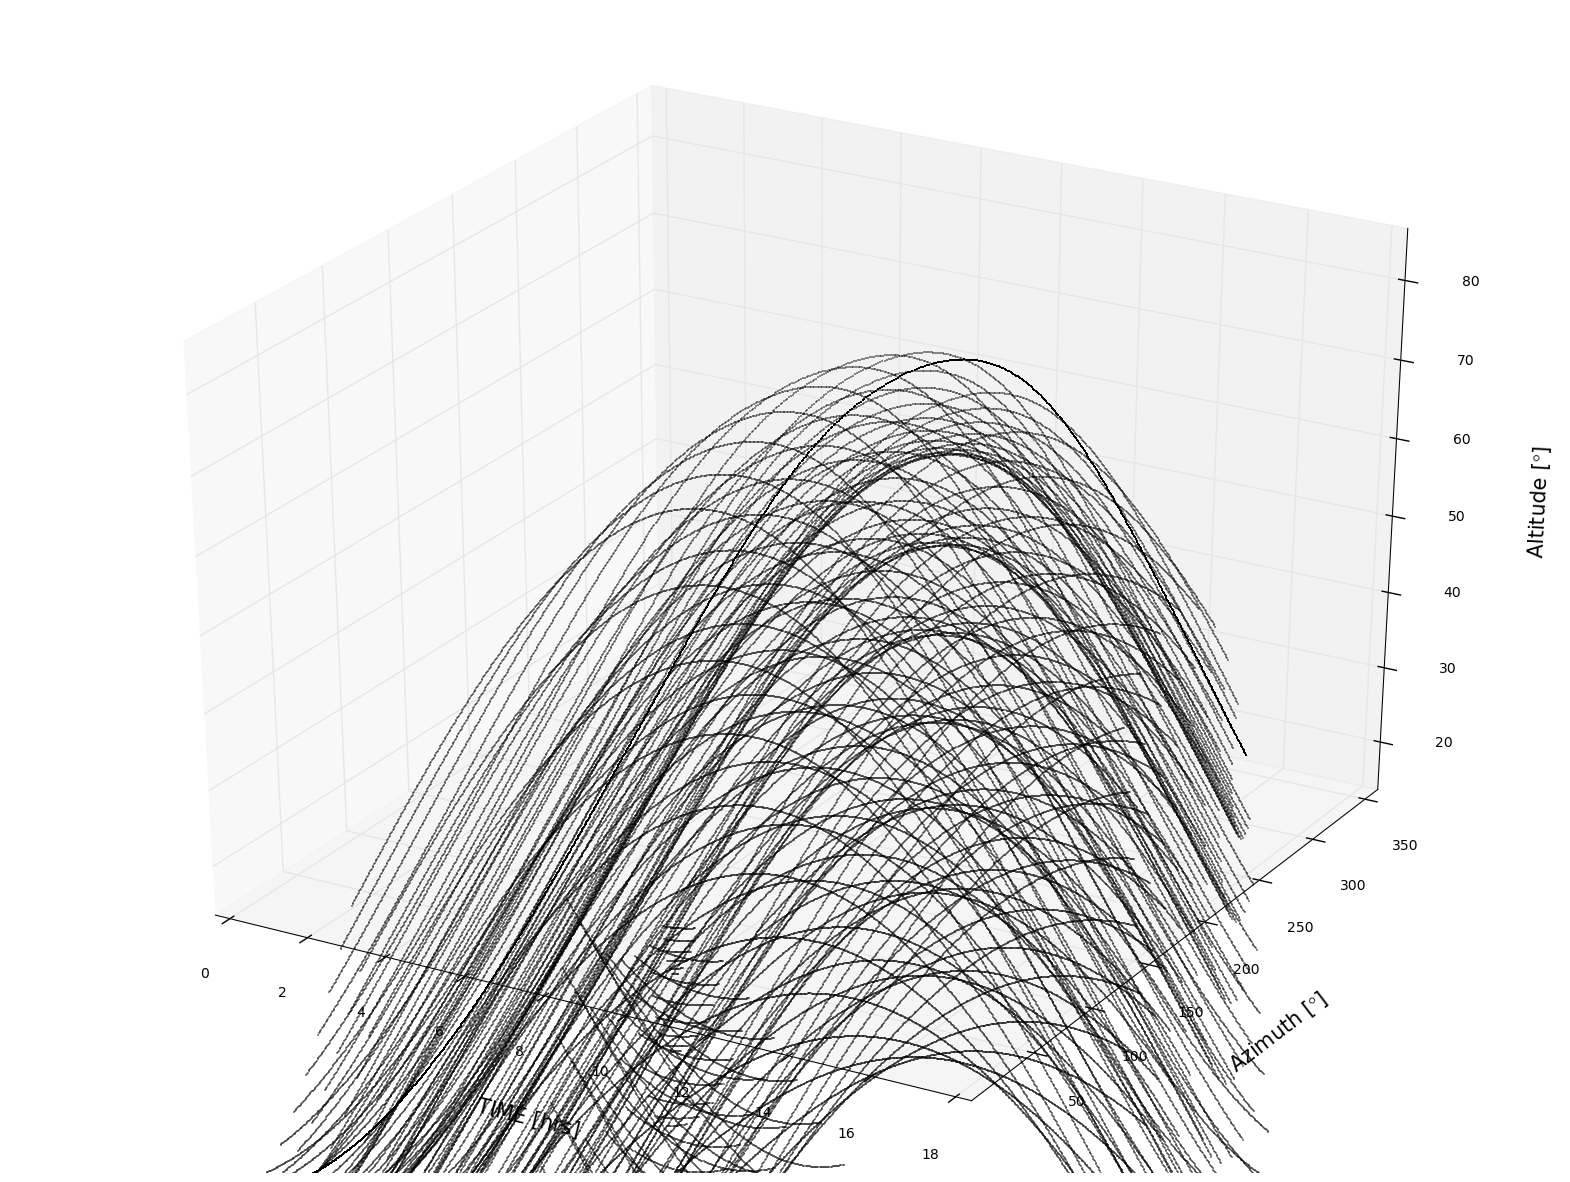

In [108]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111,projection='3d')

for i in range(int(len(Alt))):
    ax.plot((UNIX-UNIX[0])/3600,Az[i],Alt[i],'ko', markersize =0.5)
ax.set_xlabel('TIME [hrs]',fontsize=15)
ax.set_ylabel('Azimuth [$\degree$]',fontsize=15)
ax.set_zlabel('Altitude [$\degree$]',fontsize=15)
ax.set_ylim3d(5,355)
ax.set_zlim3d(15,85)
plt.show()

In [102]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import os, sys
import numpy as np


##### TO CREATE A SERIES OF PICTURES

def make_views(ax,angles,elevation=None, width=10, height = 8,
                prefix='tmprot_',**kwargs):
    """
    Makes jpeg pictures of the given 3d ax, with different angles.
    Args:
        ax (3D axis): te ax
        angles (list): the list of angles (in degree) under which to
                       take the picture.
        width,height (float): size, in inches, of the output images.
        prefix (str): prefix for the files created. 
    
    Returns: the list of files created (for later removal)
    """
    
    files = []
    ax.figure.set_size_inches(width,height)
    
    for i,angle in enumerate(angles):
    
        ax.view_init(elev = elevation, azim=angle)
        fname = '%s%03d.jpeg'%(prefix,i)
        ax.figure.savefig(fname)
        files.append(fname)
    
    return files



##### TO TRANSFORM THE SERIES OF PICTURE INTO AN ANIMATION

def make_movie(files,output, fps=5,bitrate=1800,**kwargs):
    """
    Uses mencoder, produces a .mp4/.ogv/... movie from a list of
    picture files.
    """
    
    output_name, output_ext = os.path.splitext(output)
    command = { '.mp4' : 'mencoder "mf://%s" -mf fps=%d -o %s.mp4 -ovc lavc\
                         -lavcopts vcodec=msmpeg4v2:vbitrate=%d'
                         %(",".join(files),fps,output_name,bitrate)}
                         
    command['.ogv'] = command['.mp4'] + '; ffmpeg -i %s.mp4 -r %d %s'%(output_name,fps,output)
    
    print command[output_ext]
    output_ext = os.path.splitext(output)[1]
    os.system(command[output_ext])



def make_gif(files,output,delay=100, repeat=True,**kwargs):
    """
    Uses imageMagick to produce an animated .gif from a list of
    picture files.
    """
    
    loop = -1 if repeat else 0
    os.system('convert -delay %d -loop %d %s %s'
              %(delay,loop," ".join(files),output))




def make_strip(files,output,**kwargs):
    """
    Uses imageMagick to produce a .jpeg strip from a list of
    picture files.
    """
    
    os.system('montage -tile 1x -geometry +0+0 %s %s'%(" ".join(files),output))
    
    
    
##### MAIN FUNCTION

def rotanimate(ax, angles, output, **kwargs):
    """
    Produces an animation (.mp4,.ogv,.gif,.jpeg,.png) from a 3D plot on
    a 3D ax
    
    Args:
        ax (3D axis): the ax containing the plot of interest
        angles (list): the list of angles (in degree) under which to
                       show the plot.
        output : name of the output file. The extension determines the
                 kind of animation used.
        **kwargs:
            - width : in inches
            - heigth: in inches
            - framerate : frames per second
            - delay : delay between frames in milliseconds
            - repeat : True or False (.gif only)
    """ 
        
    output_ext = os.path.splitext(output)[1]

    files = make_views(ax,angles, **kwargs)
    
    D = { '.mp4' : make_movie,
          '.ogv' : make_movie,
          '.gif': make_gif ,
          '.jpeg': make_strip,
          '.png':make_strip}
          
    D[output_ext](files,output,**kwargs)
    
    for f in files:
        os.remove(f)

In [105]:
import numpy as np
angles = np.linspace(0,360,21)[:-1] # A list of 20 angles between 0 and 360

# create an animated gif (20ms between frames)
rotanimate(ax, angles,'movie.gif',delay=50) 

